In [1]:
from action_space.experimental.screenshot.actions import screenshot
from action_space.tools.image import load_image

image = load_image(screenshot())

2304000
576000


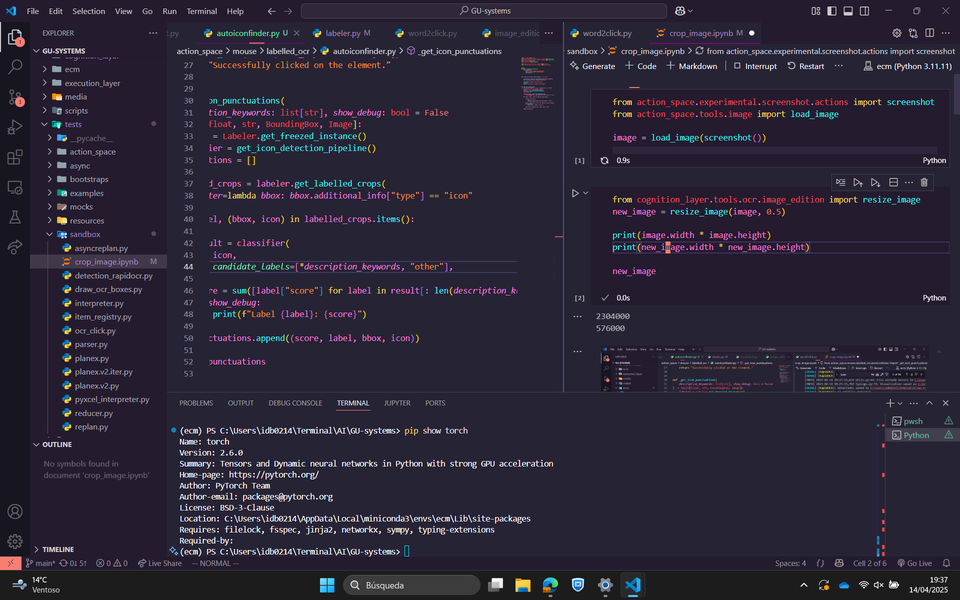

In [2]:
from cognition_layer.tools.ocr.image_edition import resize_image
new_image = resize_image(image, 0.5)

print(image.width * image.height)
print(new_image.width * new_image.height)

new_image


368640
132480


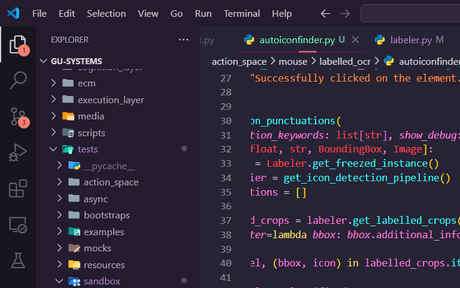

In [3]:
from cognition_layer.tools.ocr.image_edition import partial_image
crop = partial_image(image, position="top left")

new_crop = resize_image(crop, 0.6)

print(crop.width * crop.height)
print(new_crop.width * new_crop.height)

new_crop

In [4]:
from cognition_layer.tools.ocr.engine import OCR
from cognition_layer.tools.ocr.labeler import Labeler

ocr = OCR()
bboxes = ocr.invoke(crop)
labeler = Labeler(crop, bboxes)


labelled_crops = labeler.get_labelled_crops(filter=lambda bbox: bbox.additional_info["type"] == "icon")

[INFO] 2025-04-14 19:37:05,349 base.py:41: Using engine_name: onnxruntime
[INFO] 2025-04-14 19:37:05,416 utils.py:44: File already exists in C:\Users\idb0214\AppData\Local\miniconda3\envs\ecm\Lib\site-packages\rapidocr\models\ch_PP-OCRv4_det_infer.onnx
[INFO] 2025-04-14 19:37:05,496 base.py:41: Using engine_name: onnxruntime
[INFO] 2025-04-14 19:37:05,496 utils.py:44: File already exists in C:\Users\idb0214\AppData\Local\miniconda3\envs\ecm\Lib\site-packages\rapidocr\models\ch_ppocr_mobile_v2.0_cls_infer.onnx
[INFO] 2025-04-14 19:37:05,550 base.py:41: Using engine_name: onnxruntime
[INFO] 2025-04-14 19:37:05,550 utils.py:44: File already exists in C:\Users\idb0214\AppData\Local\miniconda3\envs\ecm\Lib\site-packages\rapidocr\models\ch_PP-OCRv4_rec_infer.onnx
[DEBUG] [MixedCV]: Starting MixedCV OCR processing
[DEBUG] [RapidOCR]: Running Engine
[DEBUG] [RapidOCR]: OCR completed after 5.55s
[INFO] 2025-04-14 19:37:11,278 utils.py:44: File already exists in C:\Users\idb0214\AppData\Local\mi

In [5]:
from action_space.mouse.labelled_ocr.autoiconfinder import _get_icon_punctuations
labeler.freeze()
punctuations = _get_icon_punctuations(["file"], show_debug=True)

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cpu


Label G3: 0.6639652252197266
Label G4: 0.8199828863143921
Label G5: 0.7767783999443054
Label G6: 0.6621801853179932
Label G7: 0.5792493224143982
Label G8: 0.7767783999443054
Label G9: 0.536211371421814
Label H1: 0.7250767946243286
Label H2: 0.8006526827812195
Label H3: 0.6969470381736755
Label H4: 0.6117254495620728
Label H5: 0.5461472868919373
Label H6: 0.5461472868919373
Label H7: 0.755212664604187
Label H8: 0.7419216632843018
Label H9: 0.7700084447860718
Label I1: 0.7204228639602661
Label I2: 0.7990493774414062
Label I3: 0.7413211464881897
Label I4: 0.7795805335044861
Label I5: 0.7778810858726501
Label I6: 0.7294324636459351


First 5 Winners:
[(0.8199828863143921,
  'G4',
  BoundingBox(top_left=(0, 44),
              top_right=(3, 44),
              bottom_left=(0, 104),
              bottom_right=(3, 104),
              center=(1, 74),
              content='',
              additional_info={'type': 'icon'}),
  <PIL.Image.Image image mode=RGB size=3x60 at 0x1F0F09F3690>),
 (0.8006526827812195,
  'H2',
  BoundingBox(top_left=(25, 120),
              top_right=(32, 120),
              bottom_left=(25, 127),
              bottom_right=(32, 127),
              center=(28, 123),
              content='',
              additional_info={'type': 'icon'}),
  <PIL.Image.Image image mode=RGB size=7x7 at 0x1F0E65071D0>),
 (0.7990493774414062,
  'I2',
  BoundingBox(top_left=(19, 236),
              top_right=(48, 236),
              bottom_left=(19, 259),
              bottom_right=(48, 259),
              center=(33, 247),
              content='',
              additional_info={'type': 'icon'}),
  <PIL.Image.Image im

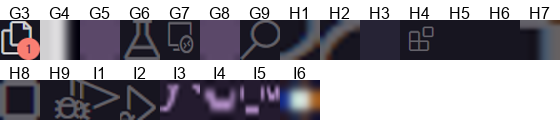

In [7]:
from pprint import pprint
sorted_results = list(sorted(punctuations, key=lambda x: x[0], reverse=True))
print("First 5 Winners:")
pprint(sorted_results[0:5])
labeler.board(filter=lambda bbox: bbox.additional_info["type"] == "icon")